In [1]:
#%pip install pyserial

In [2]:
import serial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

In [3]:
def tomaLecturas(puerto:str,cantidad:int,ancho:int=2,orden:str='little'):
    with serial.Serial(puerto) as s:
        datos=s.read(ancho*cantidad)
    return np.array([ int.from_bytes(datos[ancho*i:ancho*(i+1)],orden,signed=False) for i in range(cantidad)])

In [15]:
lecturas = tomaLecturas("COM3",4096)

In [19]:
periodograma = scipy.signal.periodogram(lecturas,500,'hamming')

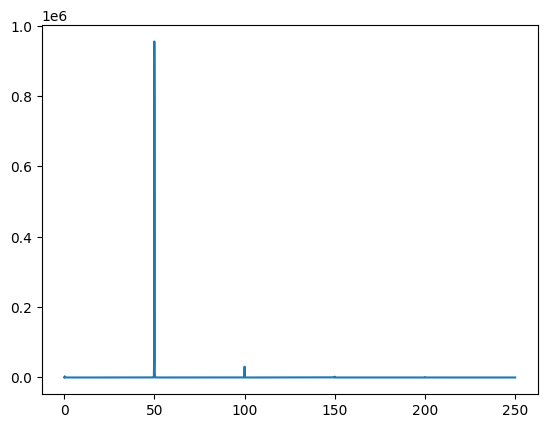

In [20]:
plt.plot(*periodograma)

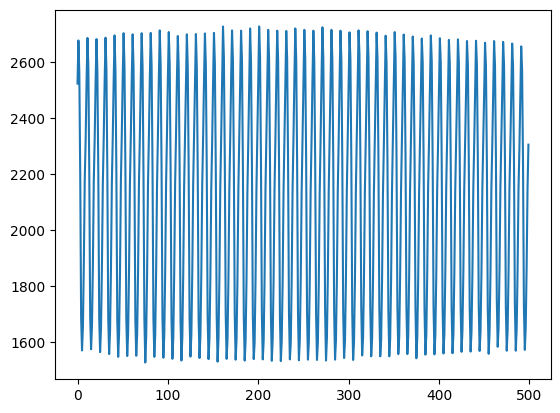

In [18]:
plt.plot(lecturas[:500])